In [1]:
# First, import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

D:\conda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the dataset with whole features
pd.set_option("display.max_columns",None)
df = pd.read_csv("house_price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Look at the shape of the dataset
df.shape

(1460, 81)

In [4]:
# Look at the features which have NaN values 
nan_features = [i for i in df.columns if df[i].isnull().sum()>0]
for i in nan_features:
    print(i,df[i].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [5]:
# Check which numerical feature(s) has NaN values
numerical_features = [var for var in nan_features if df[var].dtypes != 'O']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  3


In [6]:
num_nan = df[numerical_features]
num_nan.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [7]:
# Check which categorical feature(s) has NaN values
categorical_features = [var for var in nan_features if df[var].dtypes == 'O']
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  16


In [8]:
cat_nan = df[categorical_features]
cat_nan.head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


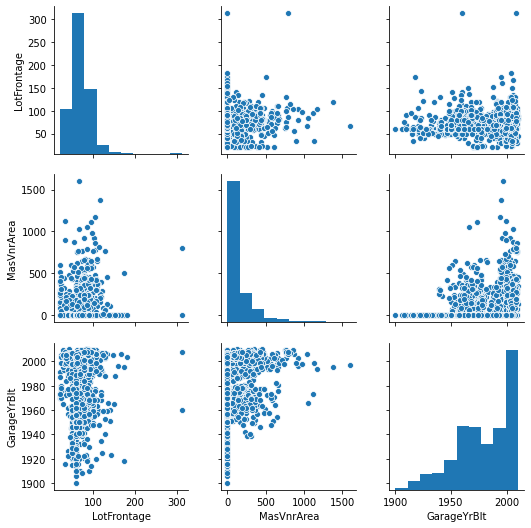

In [9]:
# First, handle the numerical ones
sns.pairplot(num_nan)

In [10]:
df["LotFrontage"].median()

69.0

In [11]:
df["LotFrontage"].fillna(69,inplace=True)

In [12]:
df["LotFrontage"].isnull().sum()

0

In [13]:
# Check for "MasVnrArea" column, it has only 8 NaN values, so we can ignore these
df["MasVnrArea"].isnull().sum()

8

In [14]:
df = df.dropna(subset=["MasVnrArea"])

In [15]:
df["MasVnrArea"].isnull().sum()

0

In [16]:
# Check for "GarageYrBlt" column
df["GarageYrBlt"].median()

1980.0

In [17]:
df["GarageYrBlt"].fillna(1980,inplace=True)

In [18]:
df["GarageYrBlt"].isnull().sum()

0

In [19]:
# I have handled the NaN values for numerical features. Now, time to handle the categorical ones
cat_nan.nunique()

Alley           2
MasVnrType      4
BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
Electrical      5
FireplaceQu     5
GarageType      6
GarageFinish    3
GarageQual      5
GarageCond      5
PoolQC          3
Fence           4
MiscFeature     4
dtype: int64

In [20]:
# First, drop the columns which has lots of NaN values
df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [21]:
# Second, I ignore the records which has very less amount of NaN values 
df = df.dropna(subset=["MasVnrType","Electrical"])

In [22]:
new_nan_features = [i for i in df.columns if df[i].isnull().sum()>0]
for i in new_nan_features:
    print(i,df[i].isnull().mean())

BsmtQual 0.025499655410062026
BsmtCond 0.025499655410062026
BsmtExposure 0.026188835286009647
BsmtFinType1 0.025499655410062026
BsmtFinType2 0.026188835286009647
FireplaceQu 0.4720882150241213
GarageType 0.055823569951757405
GarageFinish 0.055823569951757405
GarageQual 0.055823569951757405
GarageCond 0.055823569951757405


In [23]:
# Third, replace NaN values with the label: "Missing"
df[new_nan_features] = df[new_nan_features].fillna("Missing")

In [24]:
# Now, I don't have any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

In [25]:
# Check the numerical features in my dataset
numerical_features = df.select_dtypes(include=np.number)
numerical_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [26]:
# Drop the irrelevant columns  
df.drop(["Id","YearBuilt","YearRemodAdd","YrSold","GarageYrBlt","YearRemodAdd"],axis=1,inplace=True)

In [27]:
# In Linear Regression, The numerical features assume to follow the Gaussian Distribution line. So, I check this with the help of QQ-Plot.
import scipy.stats as stat  
import pylab

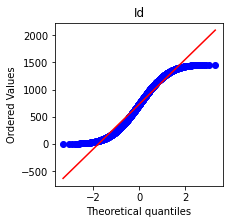

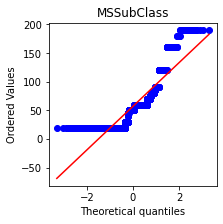

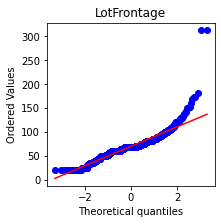

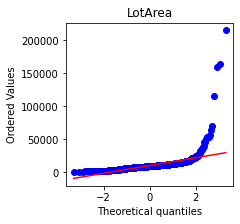

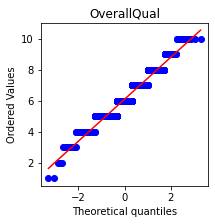

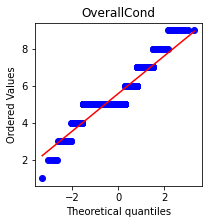

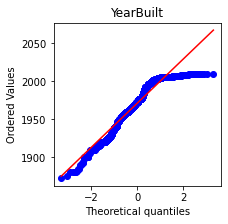

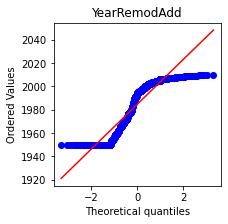

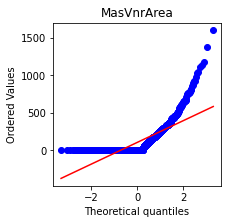

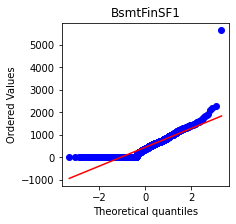

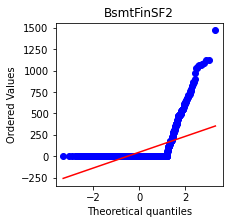

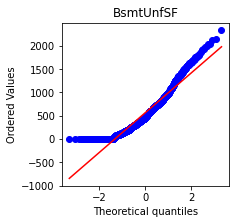

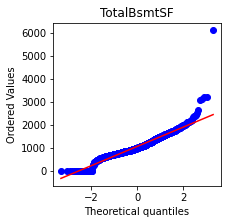

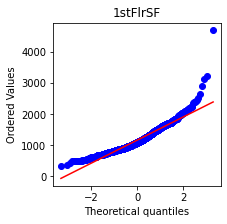

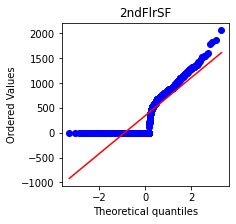

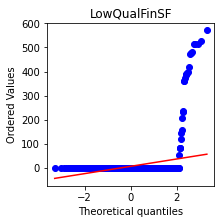

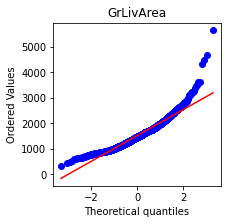

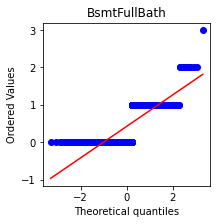

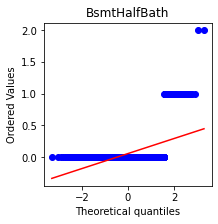

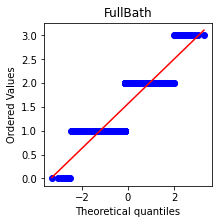

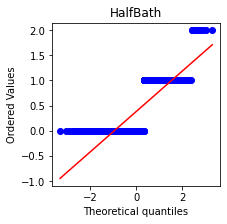

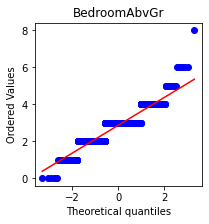

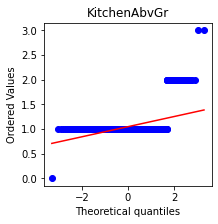

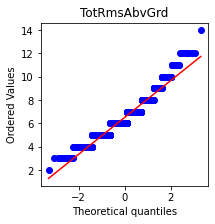

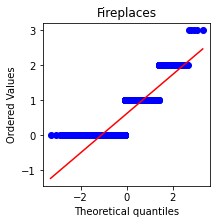

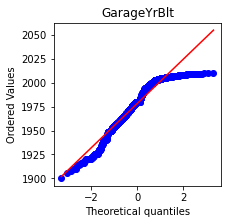

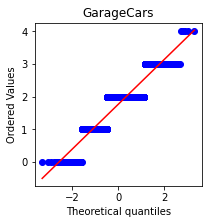

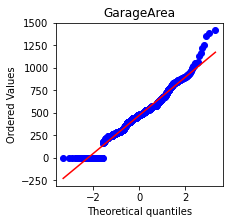

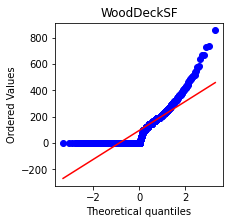

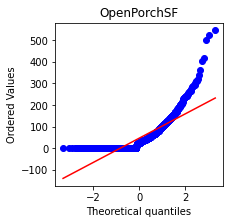

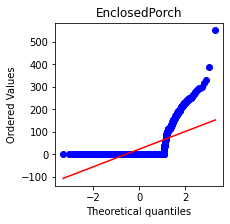

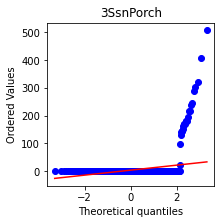

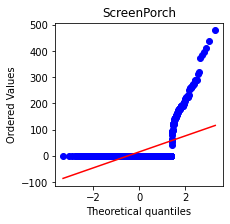

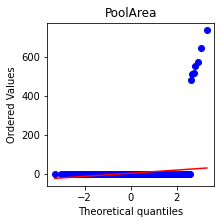

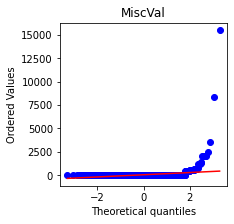

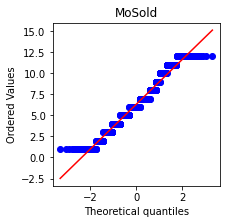

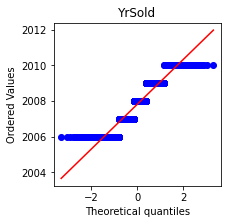

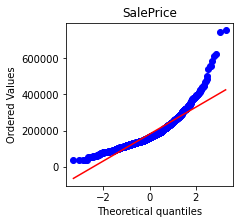

In [28]:
for i in numerical_features.columns:
    plt.figure(figsize=(3,3))
    stat.probplot(numerical_features[i],plot=pylab)
    plt.title(i)

In [29]:
# Now, decide the features which does not follow Gaussian distribution line and to get a more Gaussian distribution form with the help of Logarithmic Transformation.
for var in ["LotFrontage","LotArea","1stFlrSF","GrLivArea","SalePrice"]:
    df[var] = np.log(df[var])

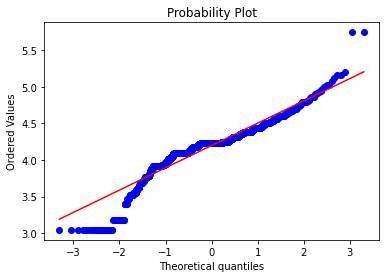

In [30]:
stat.probplot(df["LotFrontage"],plot=pylab);

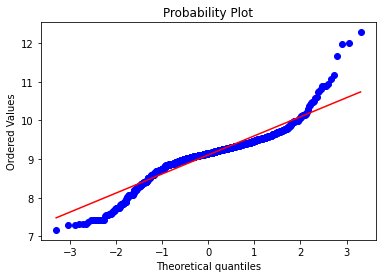

In [31]:
stat.probplot(df["LotArea"],plot=pylab);

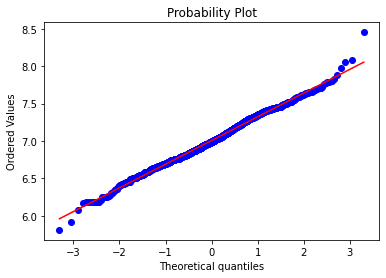

In [32]:
stat.probplot(df["1stFlrSF"],plot=pylab);

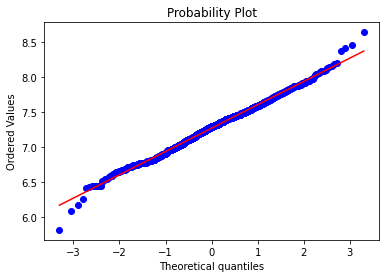

In [33]:
stat.probplot(df["GrLivArea"],plot=pylab);

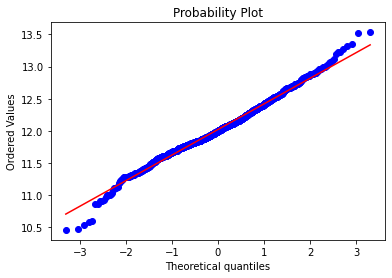

In [34]:
stat.probplot(df["SalePrice"],plot=pylab);

In [35]:
new_numerical_features = df.select_dtypes(include=np.number)
new_numerical_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,60,4.174387,9.041922,7,5,196.0,706,0,150,856,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694
1,20,4.382027,9.169518,6,8,0.0,978,0,284,1262,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011
2,60,4.219508,9.328123,7,5,162.0,486,0,434,920,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167
3,70,4.094345,9.164296,7,5,0.0,216,0,540,756,6.867974,756,0,7.448334,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398
4,60,4.430817,9.565214,8,5,350.0,655,0,490,1145,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4.127134,8.976768,6,5,0.0,0,0,953,953,6.859615,694,0,7.406711,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,12.072541
1456,20,4.442651,9.486076,6,6,119.0,790,163,589,1542,7.636752,0,0,7.636752,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,12.254863
1457,70,4.189655,9.109636,7,9,0.0,275,0,877,1152,7.080026,1152,0,7.757906,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,12.493130
1458,20,4.219508,9.181632,5,6,0.0,49,1029,0,1078,6.982863,0,0,6.982863,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,11.864462


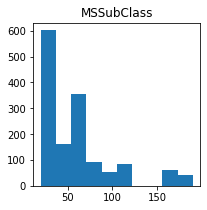

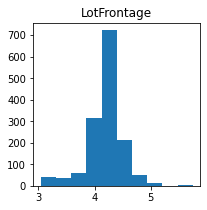

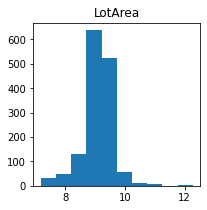

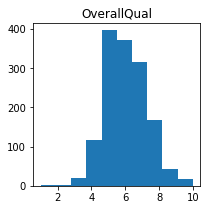

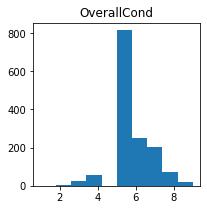

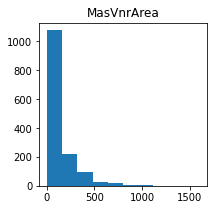

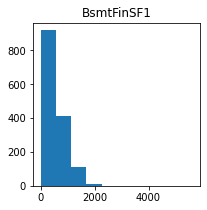

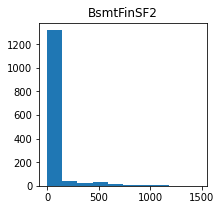

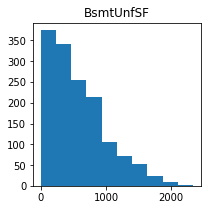

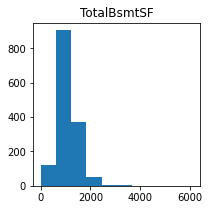

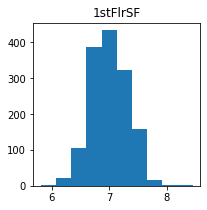

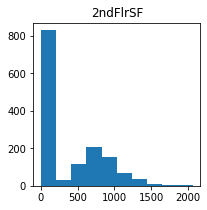

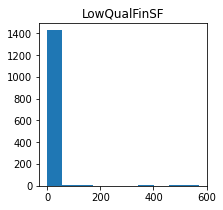

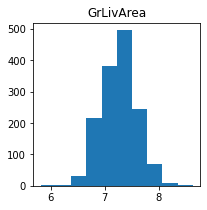

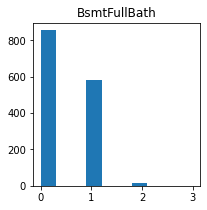

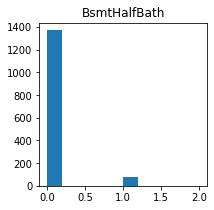

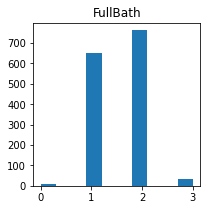

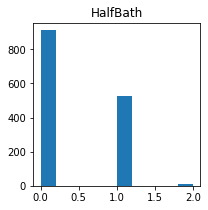

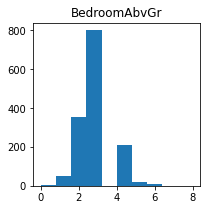

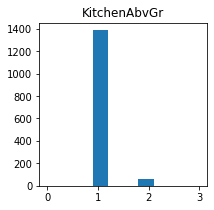

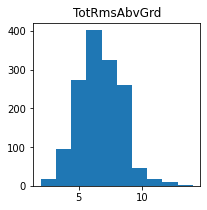

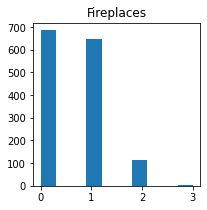

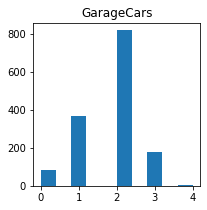

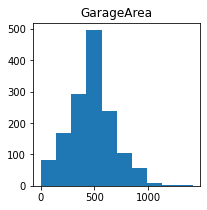

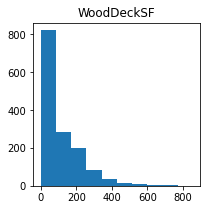

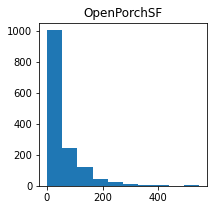

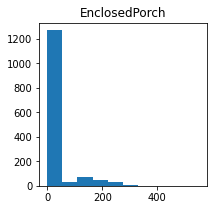

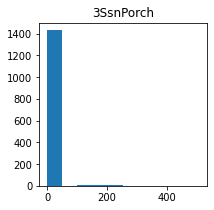

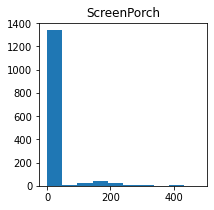

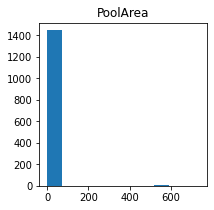

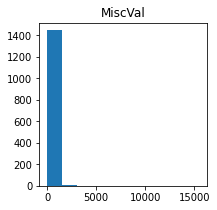

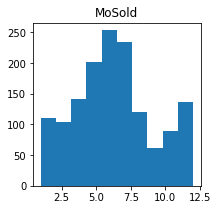

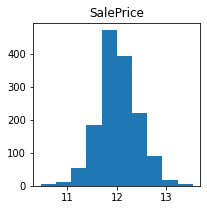

In [36]:
# Check the outliers with the help of histogram
for i in new_numerical_features.columns:
    plt.figure(figsize=(3,3))
    plt.hist(new_numerical_features[i])
    plt.title(i)

In [37]:
# Check the outliers with the following formula for necessary features
(df["BsmtUnfSF"].mean()) + (3 * df["BsmtUnfSF"].std())

1893.8246811365875

In [38]:
df[df["BsmtUnfSF"]>1894]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
137,90,RL,4.406719,9.311994,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,70.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1907,1907,GasA,Gd,Y,SBrkr,7.580189,0,0,7.580189,0,0,3,0,5,2,TA,9,Typ,0,Missing,2Types,Unf,3,766,TA,TA,Y,0,0,0,0,0,0,0,7,WD,Family,12.049419
224,20,RL,4.634729,9.508369,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,7.779885,0,0,7.779885,0,0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,Fin,3,968,TA,TA,Y,248,105,0,0,0,0,0,6,WD,Normal,12.864240
278,20,RL,4.672829,9.578450,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,Gable,CompShg,CemntBd,CmentBd,BrkFace,315.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,2121,2121,GasA,Ex,Y,SBrkr,7.659643,0,0,7.659643,0,0,2,1,3,1,Ex,8,Typ,1,Ex,Attchd,Fin,3,732,TA,TA,Y,124,98,0,0,142,0,0,5,New,Partial,12.936752
477,60,RL,4.653960,9.524640,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,772.0,Ex,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,2153,2153,GasA,Ex,Y,SBrkr,7.634821,574,0,7.879670,0,0,2,1,3,1,Ex,9,Typ,1,Gd,BuiltIn,Fin,3,694,TA,TA,Y,414,84,0,0,0,0,0,3,WD,Normal,12.847927
496,20,RL,4.234107,9.448727,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,8.079618,0,0,8.079618,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,0,5,WD,Normal,12.971540
581,20,RL,4.584967,9.449672,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,7.621685,0,0,7.621685,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,0,8,New,Partial,12.442302
678,20,RL,4.382027,9.379577,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,Stone,464.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0,Unf,0,2046,2046,GasA,Ex,Y,SBrkr,7.623642,0,0,7.623642,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,3,834,TA,TA,Y,322,82,0,0,0,0,0,7,New,Partial,12.827992
774,20,RL,4.700480,9.562827,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,375.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1935,1935,GasA,Gd,Y,SBrkr,7.587311,0,0,7.587311,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,Fin,3,895,TA,TA,Y,315,45,0,0,0,0,0,7,New,Partial,12.886641
798,60,RL,4.644391,9.511777,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,7.583756,1174,0,8.051978,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,0,7,New,Partial,13.091904
932,20,RL,4.430817,9.364777,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,7.552237,0,0,7.552237,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,0,3,WD,Normal,12.676076


In [39]:
df["BsmtUnfSF"] = np.where(df["BsmtUnfSF"]>1894,df["BsmtUnfSF"].median(),df["BsmtUnfSF"])

In [40]:
(df["GarageArea"].mean()) + (3 * df["GarageArea"].std())

1115.0404099422365

In [41]:
df[df["GarageArea"]>1115]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
178,20,RL,4.143135,9.765546,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312.0,2216,GasA,Ex,Y,SBrkr,7.711549,0,0,7.711549,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,0,7,New,Partial,13.126031
581,20,RL,4.584967,9.449672,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,479.0,2042,GasA,Ex,Y,SBrkr,7.621685,0,0,7.621685,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,0,8,New,Partial,12.442302
664,20,RL,3.891820,9.947313,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356.0,2077,GasA,Ex,Y,SBrkr,7.648263,0,0,7.648263,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,0,1,New,Partial,12.955127
825,20,RL,4.736198,9.602585,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442.0,2078,GasA,Ex,Y,SBrkr,7.642044,0,0,7.642044,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,0,6,New,Partial,12.860999
1061,30,C (all),4.787492,9.798127,Grvl,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894.0,894,GasA,TA,Y,SBrkr,6.795706,0,0,6.795706,0,0,1,0,2,1,TA,6,Typ,0,Missing,Detchd,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,560,8,ConLD,Normal,11.302204
1190,190,RL,4.234107,10.387856,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90.0,1249,GasA,Ex,Y,SBrkr,7.391415,0,0,7.391415,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,0,3,WD,Normal,12.031719
1298,60,RL,5.746203,11.064871,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466.0,6110,GasA,Ex,Y,SBrkr,8.453614,950,0,8.637994,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,New,Partial,11.982929


In [42]:
df["GarageArea"] = np.where(df["GarageArea"]>1115,df["GarageArea"].median(),df["GarageArea"])

In [43]:
df[df["WoodDeckSF"]>600]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
53,20,RL,4.219508,10.825184,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32.0,1842,GasA,Gd,Y,SBrkr,7.518607,0,0,7.518607,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,Fin,3,894.0,TA,TA,Y,857,72,0,0,0,0,0,11,WD,Normal,12.860999
335,190,RL,4.234107,12.011638,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103.0,1499,GasA,Ex,Y,SBrkr,7.389564,167,0,7.487734,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,2,529.0,TA,TA,Y,670,0,0,0,0,0,700,8,WD,Normal,12.341259
1068,160,RM,3.737670,8.285009,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,837,Unf,0,105.0,942,GasA,Gd,Y,SBrkr,7.163172,1230,0,7.832411,1,0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,Fin,2,576.0,TA,TA,Y,728,20,0,0,0,0,0,6,WD,Normal,11.927681
1210,60,RL,4.248495,9.325275,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1055.0,1055,GasA,Ex,Y,SBrkr,6.961296,790,0,7.520235,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,RFn,2,462.0,TA,TA,Y,635,104,0,0,0,0,400,5,WD,Normal,12.149502
1313,60,RL,4.682131,9.600624,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,165.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1393.0,1393,GasA,Ex,Y,SBrkr,7.259820,1177,0,7.862882,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,Fin,3,779.0,TA,TA,Y,668,30,0,0,0,0,0,5,WD,Normal,12.716402
1459,20,RL,4.317488,9.204020,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136.0,1256,GasA,Gd,Y,SBrkr,7.135687,0,0,7.135687,1,0,1,1,3,1,TA,6,Typ,0,Missing,Attchd,Fin,1,276.0,TA,TA,Y,736,68,0,0,0,0,0,6,WD,Normal,11.901583


In [44]:
df["WoodDeckSF"] = np.where(df["WoodDeckSF"]>600,df["WoodDeckSF"].median(),df["WoodDeckSF"])

In [45]:
df[df["OpenPorchSF"]>420]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
495,30,C (all),4.094345,8.971956,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225.0,720,GasA,TA,N,FuseA,6.579251,0,0,6.579251,0,0,1,0,2,1,TA,4,Typ,0,Missing,Missing,Missing,0,0.0,Missing,Missing,N,0.0,523,115,0,0,0,0,11,WD,Abnorml,10.460242
583,75,RM,4.317488,9.510445,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237.0,1237,GasA,Gd,Y,SBrkr,7.327123,1254,0,7.928406,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,Unf,2,880.0,Gd,TA,Y,105.0,502,0,0,0,0,0,7,WD,Normal,12.691580
1328,50,RM,4.094345,9.253400,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017.0,1510,GasW,Ex,Y,SBrkr,7.367709,1208,0,7.934513,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,Unf,2,520.0,Fa,TA,Y,0.0,547,0,0,480,0,1150,6,WD,Normal,12.452933


In [46]:
df["OpenPorchSF"] = np.where(df["OpenPorchSF"]>420,df["OpenPorchSF"].median(),df["OpenPorchSF"])

In [47]:
df[df["MasVnrArea"]>1000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
58,60,RL,4.189655,9.523836,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410.0,1410,GasA,Ex,Y,SBrkr,7.262629,1519,0,7.987864,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,Fin,3,641.0,TA,TA,Y,192.0,0.0,37,0,0,0,0,10,New,Partial,12.991753
70,20,RL,4.553877,9.521568,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343.0,2223,GasA,Ex,Y,SBrkr,7.706613,0,0,7.706613,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,Fin,2,516.0,TA,TA,Y,300.0,0.0,0,0,0,0,0,2,WD,Normal,12.404924
115,160,FV,3.526361,8.080237,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,Gable,CompShg,MetalSd,MetalSd,BrkFace,1129.0,TA,TA,PConc,Gd,TA,No,GLQ,419,Unf,0,310.0,729,GasA,Gd,Y,SBrkr,6.591674,729,0,7.284821,0,0,2,1,2,1,TA,5,Typ,1,Fa,Detchd,Unf,2,440.0,TA,TA,Y,0.0,32.0,0,0,0,0,0,6,WD,Normal,12.078239
297,60,FV,4.189655,8.909100,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326.0,975,GasA,Ex,Y,SBrkr,6.882437,975,0,7.575585,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,RFn,2,576.0,TA,TA,Y,0.0,10.0,0,0,198,0,0,6,WD,Normal,12.384219
691,60,RL,4.644391,9.977435,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989.0,2444,GasA,Ex,Y,SBrkr,7.801391,1872,0,8.370084,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,Fin,3,832.0,TA,TA,Y,382.0,50.0,0,0,0,0,0,1,WD,Normal,13.534473
808,80,RL,4.442651,9.503010,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,TA,TA,CBlock,TA,TA,Av,ALQ,516,BLQ,128,380.0,1024,GasA,TA,Y,SBrkr,6.990257,0,0,6.990257,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,RFn,2,484.0,TA,TA,Y,0.0,0.0,0,0,0,0,0,6,WD,Normal,11.982617
1169,60,RL,4.770685,10.484585,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543.0,1930,GasA,Ex,Y,SBrkr,7.512618,1796,0,8.196161,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,Fin,3,807.0,TA,TA,Y,361.0,76.0,0,0,0,0,0,7,WD,Normal,13.345507


In [48]:
df["MasVnrArea"] = np.where(df["MasVnrArea"]>1000,df["MasVnrArea"].median(),df["MasVnrArea"])

In [49]:
# Now, I need to handle the categorical features. First, check the categorical columns in my dataset.
new_categorical_features = df.select_dtypes(include=np.object)
new_categorical_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,WD,Normal


In [50]:
# Have a look at my categorical features, it can be seen these are all ordinal. So, apply Target Guided Ordinal encoding instead of One-Hot encoding.
for var in new_categorical_features.columns:
    ordered_labels = df.groupby([var]).mean().sort_values(by="SalePrice").index
    new_ordinal_label = {k:i for i,k in enumerate(ordered_labels,0)}
    df[var]=df[var].map(new_ordinal_label) 

In [51]:
# Identify the independent features(X) and the dependent feature(y)
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [52]:
# Split the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [53]:
# Perform the feature scaling for my independent features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Apply Lasso Regression algorithm and it's feature selection module
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
select = SelectFromModel(Lasso(alpha=0.005,random_state=0))
select.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [55]:
# Look at which features I need and which one I don't need in order
select.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True])

In [56]:
# Have a look at the important features
selected_features = X.columns[(select.get_support())]
selected_features

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'WoodDeckSF',
       'SaleCondition'],
      dtype='object')

In [57]:
# Make a list form of my features
features = selected_features.to_list()
features

['MSSubClass',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageArea',
 'WoodDeckSF',
 'SaleCondition']

In [58]:
# Perform the transform function with my final independent features 
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [59]:
X_train_selected.shape

(1305, 20)

In [60]:
# Apply Lasso Regression again
lasso = Lasso(alpha=0.001,random_state=0)
lasso.fit(X_train_selected,y_train)

Lasso(alpha=0.001, random_state=0)

In [61]:
# Predict the test set results
y_pred = lasso.predict(X_test_selected)

In [62]:
# import the r2_score for looking at the accuracy, and mean_squared_error to look at how many percentage my model has error 
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
# Check the Root mean squared error rate (RMSE)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.11241669820497739


In [64]:
# Check the accuracy of my final model
r2_score(y_test,y_pred)

0.8981352782511993

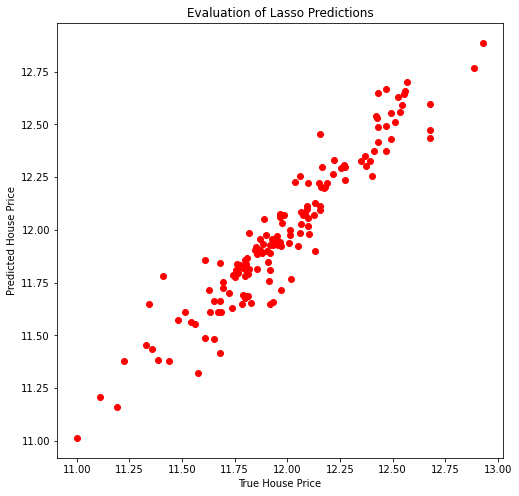

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,c="r")
plt.plot()
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions');